<h1>Inserción de la longitud en una tabla de features</h1>

In [1]:
%%time
import mysql.connector

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="tesis2",
   passwd="tesis2"
)

print("Iniciando proceso...")

cursor = conn.cursor()

query = "SELECT id_especie FROM maestra_especies"
cursor.execute(query)
especies = cursor.fetchall()
for especie in especies:
    print("\rFeatures para id-especie " + str(especie[0]), "                                       ", end="")
    query = "INSERT INTO secuencias_features (id_especie, cod_secuencia, flg_pct, flg_seleccionado, longitud) SELECT id_especie, cod_secuencia, flg_pct, flg_seleccionado, LENGTH(secuencia) FROM secuencias WHERE id_especie = %s"
    cursor.execute(query, [especie[0]])

print("\rProceso finalizado.                                                                                      ")
conn.close()

Iniciando proceso...
Proceso finalizado.                                                                                      
CPU times: user 116 ms, sys: 19.5 ms, total: 136 ms
Wall time: 7min 17s


<h1>Histogramas con la longitud según tipo de transcriptoma</h1>

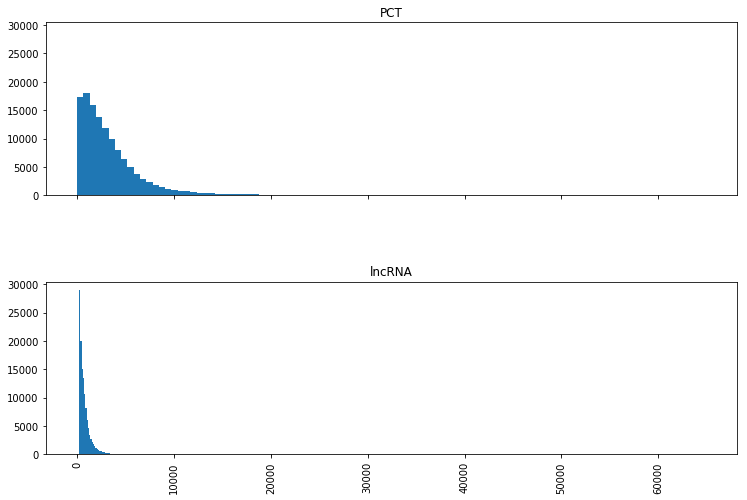

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="tesis2",
   passwd="tesis2"
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()

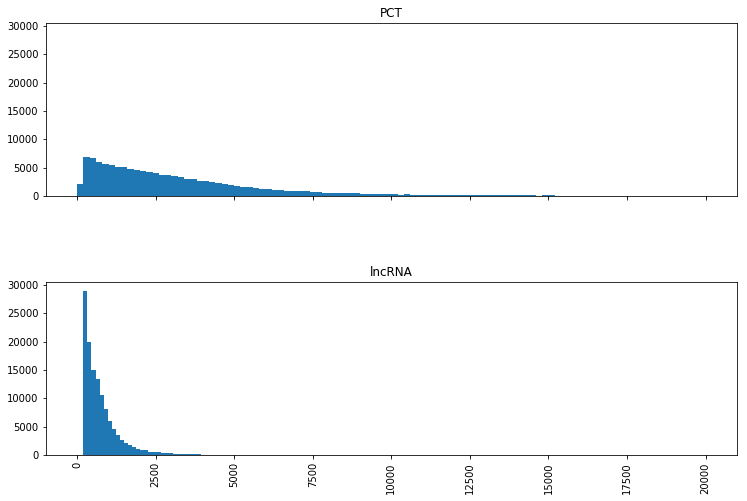

In [7]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="tesis2",
   passwd="tesis2"
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
query = query + " AND longitud < 20000"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()

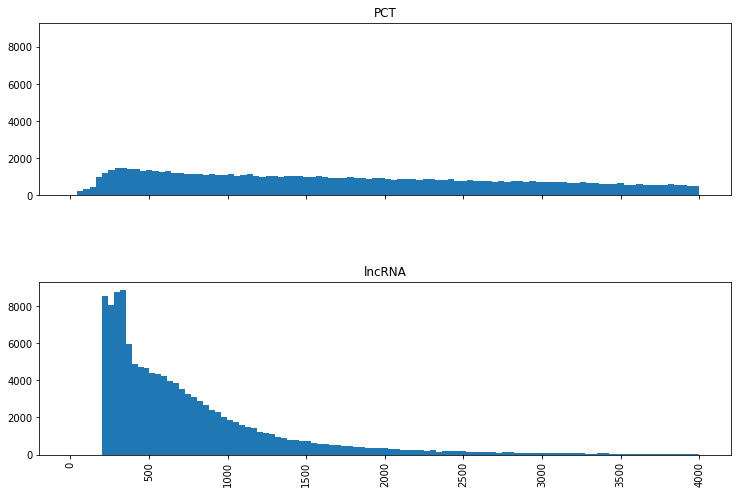

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
   host="localhost",
   database="tesis2",
   user="tesis2",
   passwd="tesis2"
)

query = "SELECT id_especie, longitud, CASE WHEN flg_pct = 1 THEN 'PCT' ELSE 'lncRNA' END AS flg_pct FROM secuencias_features WHERE flg_seleccionado = 1"
query = query + " AND longitud < 4000"
df = pd.read_sql_query(query, conn)
df.hist(by='flg_pct', column='longitud', bins=100, sharex=True, sharey = True, layout=(2,1), figsize=(12,8))

conn.close()